<a href="https://colab.research.google.com/github/Ronnalmil/ASIR2/blob/main/Copia_de_Proyecto_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GRAFICOS A HACER**
📊 1. Gráfico de línea: flows a lo largo del tiempo

Qué muestra: La evolución de la cantidad de flujos en intervalos de tiempo.

Por qué es útil: Un aumento repentino en el número de flujos puede indicar un ataque DDoS (por ejemplo, miles de bots abriendo sesiones simultáneamente).

Tipo de gráfico: Line plot (x = tiempo, y = número de flujos).

Columna clave: dt vs flows

📊 2. Histograma de la tasa de paquetes (pktrate)

Qué muestra: La distribución de tasas de paquetes entre los flujos.

Por qué es útil: Un DDoS suele tener tasas anormalmente altas. Este gráfico te ayuda a ver si hay valores extremos (outliers).

Tipo de gráfico: Histograma con KDE.

Columna clave: pktrate

📊 3. Scatter plot: pktcount vs bytecount

Qué muestra: La relación entre número de paquetes y cantidad de datos transferidos por flujo.

Por qué es útil: En ataques, puede haber muchos paquetes con pocos bytes (como pings o SYNs). Te ayuda a ver patrones anómalos.

Tipo de gráfico: Diagrama de dispersión.

Columna clave: pktcount (x) vs bytecount (y)

📊 4. Gráfico de barras: Cantidad de flujos por Protocol

Qué muestra: Cuántos flujos se han realizado por cada protocolo (TCP, UDP, ICMP, etc.).

Por qué es útil: Algunos ataques se basan en protocolos específicos (ej. UDP flood, ICMP flood). Un pico en un protocolo puede indicar ataque.

Tipo de gráfico: Bar chart.

Columna clave: Protocol

📊 5. Heatmap de IPs origen (src) vs IPs destino (dst)

Qué muestra: Frecuencia de comunicación entre pares de IPs.

Por qué es útil: En un DDoS, muchas IPs de origen apuntan a una sola IP destino. Esto se ve claramente en un heatmap.

Tipo de gráfico: Mapa de calor (heatmap) de conteo.

Columnas clave: src vs dst

📊 6. Gráfico de línea: tot_kbps a lo largo del tiempo

Qué muestra: Uso total del ancho de banda (tx + rx) en el tiempo.

Por qué es útil: Un DDoS suele generar picos repentinos de tráfico. Este gráfico te permite ver esos momentos críticos.

Tipo de gráfico: Line plot.

Columna clave: dt vs tot_kbps

In [2]:
#Primero paso importar el fichero CSV de mi ordenador a colab.
from google.colab import files

# Esto abrirá una ventana para seleccionar tu archivo CSV
uploaded = files.upload()


Saving dataset_sdn_normal.csv to dataset_sdn_normal.csv


In [3]:
#Link : https://www.kaggle.com/datasets/shayalvaghasiya/ddos-sdn?resource=download

# dt: Generalmente representa la marca de tiempo (datetime) en que ocurrió el evento o captura del dato.
# switch: Puede referirse al identificador del switch de red donde se capturó el paquete o flujo.
# src: Dirección IP de origen (source IP).
# dst: Dirección IP de destino (destination IP).
# pktcount: Número total de paquetes en un flujo o intervalo de tiempo.
# bytecount: Número total de bytes transferidos en ese flujo o intervalo.
# dur: Duración del flujo o sesión en segundos (o la unidad de tiempo que uses).
# dur_nsec: Duración con mayor precisión en nanosegundos (parte fraccionaria de dur).
# tot_dur: Duración total acumulada o alguna duración combinada de múltiples flujos o sesiones.
# flows: Cantidad de flujos en un intervalo o segmento de tiempo.
# packetins: Paquetes entrantes (inbound packets).
# pktperflow: Promedio de paquetes por flujo (packet count / number of flows).
# byteperflow: Promedio de bytes por flujo (byte count / number of flows).
# pktrate: Tasa de paquetes, puede ser paquetes por segundo u otra unidad de tiempo.
# Pairflow: Probablemente representa un identificador de flujo par (bidireccional), por ejemplo combinación src-dst y dst-src.
# Protocol: Protocolo de transporte o red usado (TCP, UDP, ICMP, etc.).
# port_no: Número de puerto asociado (generalmente el puerto de destino o fuente).
# tx_bytes: Bytes transmitidos (transmitted bytes).
# rx_bytes: Bytes recibidos (received bytes).
# tx_kbps: Kilobits por segundo transmitidos (tasa de transmisión).
# rx_kbps: Kilobits por segundo recibidos (tasa de recepción).
# A1 y A2: Podrían ser atributos adicionales específicos de tu dataset, como indicadores de tipo de flujo, estado, o categorías asignadas (pueden ser etiquetas o métricas personalizadas).
# tot_kbps: Total de kilobits por segundo (tx_kbps + rx_kbps).
# label: Etiqueta o clase para clasificación, por ejemplo si el flujo es benigno o malicioso (útil en aprendizaje automático).
#Paso dos muestra la tabla pero las 5 primeras filas.

#import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('/content/dataset_sdn_normal.csv')
dataset.head()


,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,A1,A2,tot_kbps,label
0,11425,1,167772161,167772168,45304,48294064,100,716000000,1.010000e+11,3,...,1,3,143928631,3917,0,0.0,0,0,0.0,0
1,11605,1,167772161,167772168,126395,134737070,280,734000000,2.810000e+11,2,...,1,4,3842,3520,0,0.0,0,0,0.0,0
2,11425,1,167772162,167772168,90333,96294978,200,744000000,2.010000e+11,3,...,1,1,3795,1242,0,0.0,0,0,0.0,0
3,11425,1,167772162,167772168,90333,96294978,200,744000000,2.010000e+11,3,...,1,2,3688,1492,0,0.0,0,0,0.0,0
4,11425,1,167772162,167772168,90333,96294978,200,744000000,2.010000e+11,3,...,1,3,3413,3665,0,0.0,0,0,0.0,0


In [4]:
# Suma por columna
suma = dataset.sum(numeric_only=True)

# Media por columna
media = dataset.mean(numeric_only=True)

print("=== Suma por columna ===")
print(suma)

print("\n=== Media por columna ===")
print(media)


=== Suma por columna ===
dt             1.206649e+09
switch         2.650710e+05
src            1.066377e+13
dst            1.066377e+13
pktcount       2.295391e+09
bytecount      1.738065e+12
dur            2.185625e+07
dur_nsec       2.891638e+13
tot_dur        2.188057e+16
flows          3.867510e+05
packetins      3.312488e+08
pktperflow     3.725199e+08
byteperflow    3.056108e+11
pktrate        1.238214e+07
Pairflow       3.942500e+04
Protocol       2.182377e+06
port_no        1.484280e+05
tx_bytes       6.314912e+12
rx_bytes       6.318295e+12
tx_kbps        6.426804e+07
rx_kbps        6.427517e+07
A1             0.000000e+00
A2             0.000000e+00
tot_kbps       1.285432e+08
label          0.000000e+00
dtype: float64

=== Media por columna ===
dt             1.898411e+04
switch         4.170340e+00
src            1.677722e+08
dst            1.677722e+08
pktcount       3.611320e+04
bytecount      2.734483e+07
dur            3.438627e+02
dur_nsec       4.549390e+08
tot_dur  

In [ ]:
#paso 3 opcional guardar los resultados en un CSV
#tambien dibujar la grafica
resultados = pd.DataFrame({
    'Suma': suma,
    'Media': media
})
resultados.to_csv('resultados_estadisticos.csv', index=True)


In [5]:
#paso 4 calculamos solo dos columnas
# Sumar solo las columnas tx_bytes y rx_bytes
suma_tx = dataset['tx_bytes'].sum()
suma_rx = dataset['rx_bytes'].sum()

print("Suma de tx_bytes:", suma_tx)
print("Suma de rx_bytes:", suma_rx)

# Si quieres la suma total combinada:
suma_total = suma_tx + suma_rx
print("Suma total (tx + rx):", suma_total)


Suma de tx_bytes: 6314911846967
Suma de rx_bytes: 6318294895481
Suma total (tx + rx): 12633206742448


In [6]:
#paso 5 promedio de dos columnas
media_tx = dataset['tx_bytes'].mean()
media_rx = dataset['rx_bytes'].mean()

print("Media de tx_bytes:", media_tx)
print("Media de rx_bytes:", media_rx)

media_total = (media_tx + media_rx) / 2
print("Media total promedio:", media_total)


Media de tx_bytes: 99351990.16640708
Media de rx_bytes: 99405215.39121474
Media total promedio: 99378602.77881092


In [7]:
#paso 6 creo la columna mostrando el total de bytes de dos columnas
dataset['total_bytes'] = dataset['tx_bytes'] + dataset['rx_bytes']
dataset.head()


,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,A1,A2,tot_kbps,label,total_bytes
0,11425,1,167772161,167772168,45304,48294064,100,716000000,1.010000e+11,3,...,3,143928631,3917,0,0.0,0,0,0.0,0,143932548
1,11605,1,167772161,167772168,126395,134737070,280,734000000,2.810000e+11,2,...,4,3842,3520,0,0.0,0,0,0.0,0,7362
2,11425,1,167772162,167772168,90333,96294978,200,744000000,2.010000e+11,3,...,1,3795,1242,0,0.0,0,0,0.0,0,5037
3,11425,1,167772162,167772168,90333,96294978,200,744000000,2.010000e+11,3,...,2,3688,1492,0,0.0,0,0,0.0,0,5180
4,11425,1,167772162,167772168,90333,96294978,200,744000000,2.010000e+11,3,...,3,3413,3665,0,0.0,0,0,0.0,0,7078


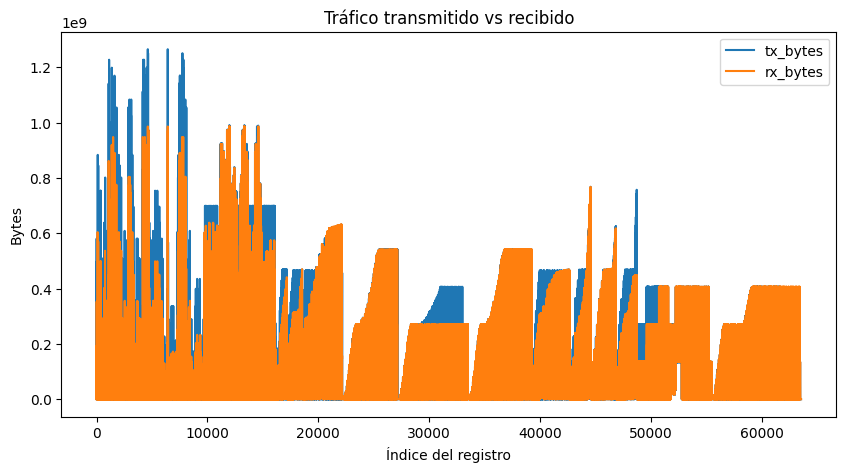

In [10]:
#paso7 visualizar el comportamiento
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(dataset['tx_bytes'], label='tx_bytes')
plt.plot(dataset['rx_bytes'], label='rx_bytes')
plt.legend()
plt.title('Tráfico transmitido vs recibido')
plt.xlabel('Índice del registro')
plt.ylabel('Bytes')
plt.show()


In [11]:
#paso 8
#Analizar la relación entre ambas columnas
#Si el valor está cerca de 1, significa que cuando uno aumenta, el otro también (están muy relacionados)

Para ver si hay correlación entre bytes transmitidos y recibidos:
correlacion = dataset['tx_bytes'].corr(dataset['rx_bytes'])
print("Correlación entre tx_bytes y rx_bytes:", correlacion)


Correlación entre tx_bytes y rx_bytes: 0.18242300453331012


In [12]:
#paso 9
#filtrar los flujos con tráfico inusualmente alto
#muestra los registros con tráfico 5 veces superior al promedio
dataset[dataset['tx_bytes'] > dataset['tx_bytes'].mean() * 5]


,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,A1,A2,tot_kbps,label,total_bytes
14,11425,1,167772161,167772168,45304,48294064,100,716000000,1.010000e+11,3,...,2,580813093,2586,19164,0.0,0,0,19164.0,0,580815679
26,11515,1,167772161,167772168,85676,91330616,190,726000000,1.910000e+11,3,...,4,498833803,4715,12831,0.0,0,0,12831.0,0,498838518
98,11425,1,167772162,167772168,90333,96294978,200,744000000,2.010000e+11,3,...,2,580813093,2586,19164,0.0,0,0,19164.0,0,580815679
111,11605,1,167772161,167772168,126395,134737070,280,734000000,2.810000e+11,2,...,2,883628354,3580,10251,0.0,0,0,10251.0,0,883631934
135,11605,1,167772161,167772168,126395,134737070,280,734000000,2.810000e+11,2,...,4,604240410,5186,8969,0.0,0,0,8969.0,0,604245596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48696,5627,5,167772167,167772169,118474,136439828,279,129000000,2.790000e+11,5,...,3,717851542,43567486,7823,288.0,0,0,8111.0,0,761419028
48701,5627,5,167772165,167772169,98442,112085132,229,51000000,2.290000e+11,5,...,3,717851542,43567486,7823,288.0,0,0,8111.0,0,761419028
48719,5657,5,167772167,167772169,127519,146671614,309,132000000,3.090000e+11,5,...,3,742725448,44507308,6633,250.0,0,0,6883.0,0,787232756
48724,5657,5,167772165,167772169,111130,126641916,259,54000000,2.590000e+11,5,...,3,742725448,44507308,6633,250.0,0,0,6883.0,0,787232756


In [13]:
#paso 10 calcular la anomalia y su grafica nuevo
# Calcular el umbral de anomalía
umbral = dataset['tx_bytes'].mean() * 5

# Filtrar las filas que superan ese valor
anomalías = dataset[dataset['tx_bytes'] > umbral]

# Mostrar las primeras filas de las anomalías
anomalías.head()


,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,A1,A2,tot_kbps,label,total_bytes
14,11425,1,167772161,167772168,45304,48294064,100,716000000,1.010000e+11,3,...,2,580813093,2586,19164,0.0,0,0,19164.0,0,580815679
26,11515,1,167772161,167772168,85676,91330616,190,726000000,1.910000e+11,3,...,4,498833803,4715,12831,0.0,0,0,12831.0,0,498838518
98,11425,1,167772162,167772168,90333,96294978,200,744000000,2.010000e+11,3,...,2,580813093,2586,19164,0.0,0,0,19164.0,0,580815679
111,11605,1,167772161,167772168,126395,134737070,280,734000000,2.810000e+11,2,...,2,883628354,3580,10251,0.0,0,0,10251.0,0,883631934
135,11605,1,167772161,167772168,126395,134737070,280,734000000,2.810000e+11,2,...,4,604240410,5186,8969,0.0,0,0,8969.0,0,604245596


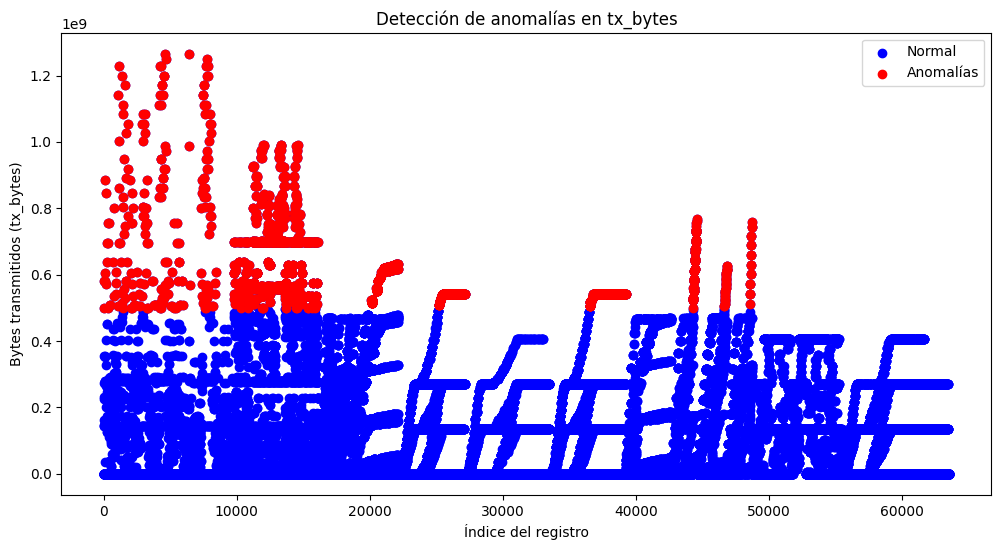

In [14]:
#paso 11 muestra la grafica
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Mostrar todos los datos como puntos azules
plt.scatter(dataset.index, dataset['tx_bytes'], color='blue', label='Normal')

# Resaltar las anomalías en rojo
plt.scatter(anomalías.index, anomalías['tx_bytes'], color='red', label='Anomalías')

plt.title('Detección de anomalías en tx_bytes')
plt.xlabel('Índice del registro')
plt.ylabel('Bytes transmitidos (tx_bytes)')
plt.legend()
plt.show()


In [15]:
#paso 12 exportar a un archivo CSV
# Exportar el DataFrame de anomalías a CSV
anomalías.to_csv('anomalías_tx_bytes.csv', index=False)

print("✅ Archivo 'anomalías_tx_bytes.csv' guardado correctamente.")


✅ Archivo 'anomalías_tx_bytes.csv' guardado correctamente.


In [16]:
#paso 13 descargarlo directamente desde colab paso opcional al paso 12
from google.colab import files
files.download('anomalías_tx_bytes.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
#paso 14 calcula el maximo y minimo de dos columnas: tx y rx
# Máximo y mínimo de tx_bytes
max_tx = dataset['tx_bytes'].max()
min_tx = dataset['tx_bytes'].min()

# Máximo y mínimo de rx_bytes
max_rx = dataset['rx_bytes'].max()
min_rx = dataset['rx_bytes'].min()

print("Máximo de tx_bytes:", max_tx)
print("Mínimo de tx_bytes:", min_tx)
print("Máximo de rx_bytes:", max_rx)
print("Mínimo de rx_bytes:", min_rx)


Máximo de tx_bytes: 1265626297
Mínimo de tx_bytes: 2527
Máximo de rx_bytes: 987911011
Mínimo de rx_bytes: 856


In [18]:
#paso 15
#Si además quieres ver la fila completa donde ocurre el valor máximo o mínimo
# Fila con el máximo de tx_bytes
fila_max_tx = dataset.loc[dataset['tx_bytes'].idxmax()]
# Fila con el mínimo de tx_bytes
fila_min_tx = dataset.loc[dataset['tx_bytes'].idxmin()]

# Fila con el máximo de rx_bytes
fila_max_rx = dataset.loc[dataset['rx_bytes'].idxmax()]
# Fila con el mínimo de rx_bytes
fila_min_rx = dataset.loc[dataset['rx_bytes'].idxmin()]

print("Fila con máximo tx_bytes:\n", fila_max_tx)
print("\nFila con mínimo tx_bytes:\n", fila_min_tx)
print("\nFila con máximo rx_bytes:\n", fila_max_rx)
print("\nFila con mínimo rx_bytes:\n", fila_min_rx)


Fila con máximo tx_bytes:
 dt             1.223500e+04
switch         3.000000e+00
src            1.677722e+08
dst            1.677722e+08
pktcount       1.309150e+05
bytecount      1.395554e+08
dur            2.900000e+02
dur_nsec       8.000000e+08
tot_dur        2.910000e+11
flows          2.000000e+00
packetins      2.242000e+03
pktperflow     1.368400e+04
byteperflow    1.458714e+07
pktrate        4.560000e+02
Pairflow       0.000000e+00
Protocol       1.000000e+00
port_no        2.000000e+00
tx_bytes       1.265626e+09
rx_bytes       5.162000e+03
tx_kbps        3.843000e+03
rx_kbps        0.000000e+00
A1             0.000000e+00
A2             0.000000e+00
tot_kbps       3.843000e+03
label          0.000000e+00
total_bytes    1.265631e+09
Name: 4627, dtype: float64

Fila con mínimo tx_bytes:
 dt             1.431500e+04
switch         8.000000e+00
src            1.677722e+08
dst            1.677722e+08
pktcount       2.098600e+04
bytecount      2.501164e+07
dur            5.10000

In [19]:
#paso 16  exportamos a un CSV
# Crear un DataFrame resumen
extremos = pd.DataFrame({
    'Métrica': ['Máximo tx_bytes', 'Mínimo tx_bytes', 'Máximo rx_bytes', 'Mínimo rx_bytes'],
    'Valor': [max_tx, min_tx, max_rx, min_rx]
})

# Guardar a CSV
extremos.to_csv('valores_extremos_tx_rx.csv', index=False)

print("✅ Archivo 'valores_extremos_tx_rx.csv' guardado correctamente.")


✅ Archivo 'valores_extremos_tx_rx.csv' guardado correctamente.


In [20]:
#PASO 17
print("Promedio tx_bytes:", dataset['tx_bytes'].mean())
print("Promedio rx_bytes:", dataset['rx_bytes'].mean())


Promedio tx_bytes: 99351990.16640708
Promedio rx_bytes: 99405215.39121474


/tmp/ipython-input-2202345449.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([dataset['tx_bytes'], dataset['rx_bytes']], labels=['tx_bytes', 'rx_bytes'])


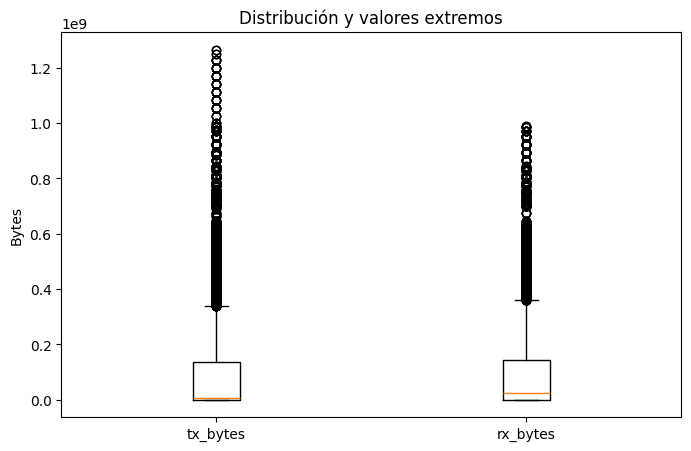

In [21]:
#PASO 18
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.boxplot([dataset['tx_bytes'], dataset['rx_bytes']], labels=['tx_bytes', 'rx_bytes'])
plt.title('Distribución y valores extremos')
plt.ylabel('Bytes')
plt.show()


In [ ]:
rx_bytes = dataset['rx_bytes'].to_numpy()
tx_bytes = dataset['tx_bytes'].to_numpy()
protocol = dataset['Protocol'].to_numpy()

In [ ]:
dataset.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'A1', 'A2', 'tot_kbps', 'label'],
      dtype='object')

In [ ]:
#tx_bytes = dataset['tx_bytes'].to_numpy()
#tx_bytes_sum = tx_bytes.sum()
#tx_bytes_mean = tx_bytes.mean()
#tx_bytes_max = tx_bytes.max()
#tx_bytes_min= tx_bytes.min()
#print('Total de tx_bytes enviados:', tx_bytes_sum)
#print('Media de tx_bytes:', tx_bytes_mean)
#print('Maximo de tx_bytes', tx_bytes_max)
#print('Minimo de tx_bytes', tx_bytes_min)

Text(0, 0.5, 'MB transmitidos')

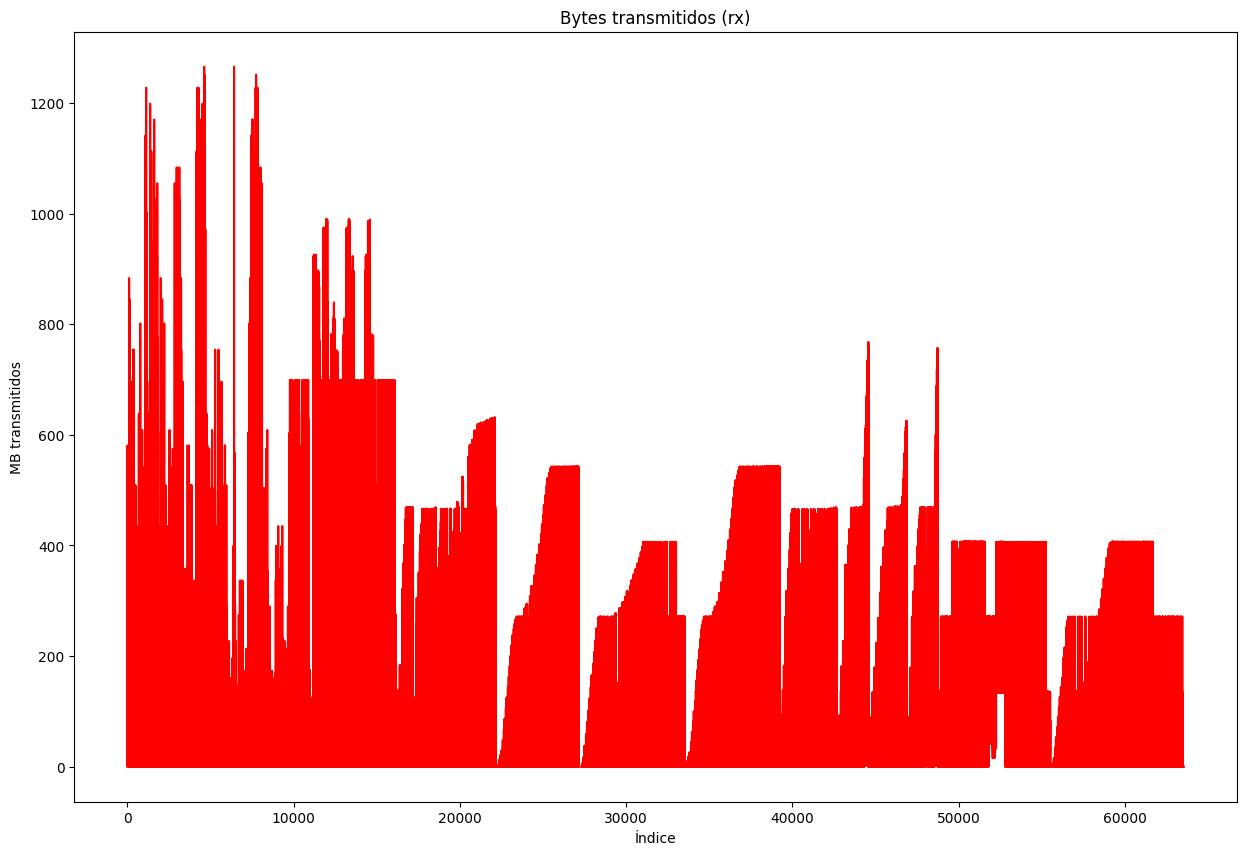

In [ ]:

tx_bytes = dataset['tx_bytes'] / 1e6  # Al tener tantos bytes los convertimos a mbs
plt.figure(figsize = (15,10))
plt.plot(tx_bytes, 'red')
plt.title('Bytes transmitidos (rx)')
plt.xlabel('Índice')
plt.ylabel('MB transmitidos')

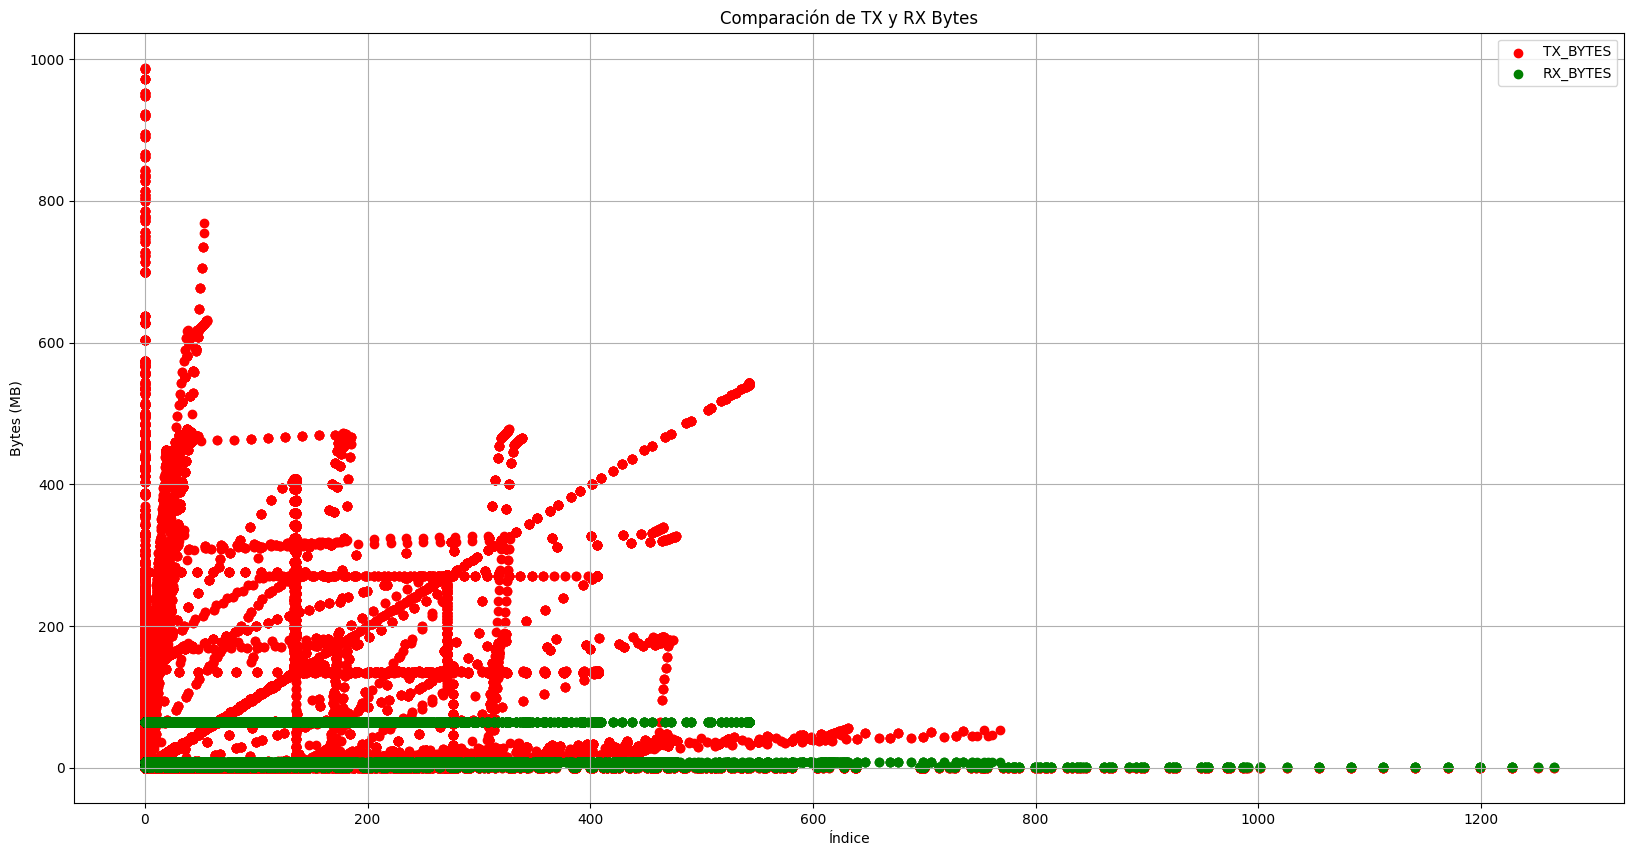

In [ ]:

tx_bytes = dataset['tx_bytes'] / 1e6
rx_bytes = dataset['rx_bytes'] / 1e6

plt.figure(figsize=(20, 10))
plt.scatter(x = tx_bytes, y = rx_bytes, color='red', label='TX_BYTES')
plt.scatter(x = tx_bytes, y = protocol, color='green', label='RX_BYTES')

plt.title('Comparación de TX y RX Bytes')
plt.xlabel('Índice')
plt.ylabel('Bytes (MB)')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
tx_bytes = dataset['tx_bytes'] / 1e6
rx_bytes = dataset['rx_bytes'] / 1e6

# Graficar tx_bytes y rx_bytes con diferentes colores
plt.figure(figsize=(20, 10))
plt.scatter(range(n), tx_bytes, color='red', label='TX_BYTES')
plt.scatter(range(n), rx_bytes, color='green', label='RX_BYTES')

plt.title('Comparación de TX y RX Bytes')
plt.xlabel('Índice')
plt.ylabel('Bytes (MB)')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'n' is not defined

<Figure size 2000x1000 with 0 Axes>